### Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других[1]. Вне области экономики иногда называется также распределением Брэдфорда.

Пусть случайная величина $ {\displaystyle X}￼ $ такова, что её распределение задаётся равенством:

$$ {\displaystyle F_{X}(x)=P(X<x)=1-\left({\frac {x_{m}}{x}}\right)^{k},\;\forall x\geq x_{m}},  
где   {\displaystyle x_{m},k>0}￼. $$ Тогда говорят, что $ {\displaystyle X}￼ $ имеет распределение Парето с параметрами $ {\displaystyle x_{m}}￼ $ и $ {\displaystyle k}￼ $. Плотность распределения Парето имеет вид:

$$ {\displaystyle f_{X}(x)=\left\{{\begin{matrix}{\frac {kx_{m}^{k}}{x^{k+1}}},&x\geq x_{m}\\0,&x<x_{m}\end{matrix}}\right..}￼ $$

In [45]:
import numpy as np
from scipy.stats import pareto
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки 

In [46]:
b = 5.0
rv = pareto(b)  
r = pareto.rvs(b, size=1000) # Generate random numbers
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(.999, b), 1000)
ax.hist(r, normed=True)
ax.grid(True)

нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

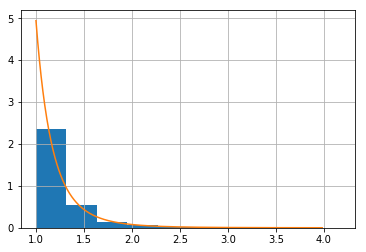

In [47]:
rpdf = rv.pdf(x)
ax.plot(x, rpdf)
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

In [48]:
def avgN(n=0, count=0, k=0):
    if n == 0 or count == 0: return None
    a = []
    i = 0
    while i < count:
        s = 0
        values = pareto.rvs(k, size=n)
        for value in values:
            s = s + value
        a.append(s/n)
        i = i + 1
    return a

n5 = avgN(n=5, count=1000, k=b)
n10 = avgN(n=10, count=1000, k=b)
n15 = avgN(n=15, count=1000, k=b)
n20 = avgN(n=20, count=1000, k=b)
n25 = avgN(n=25, count=1000, k=b)
n100 = avgN(n=100, count=1000, k=b)

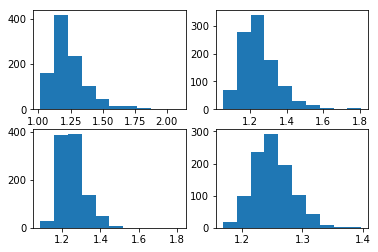

In [49]:
fig = plt.figure(1)
ax1 = fig.add_subplot(221)
ax1.hist(n5)
ax2 = fig.add_subplot(222)
ax2.hist(n10)
#ax3 = fig.add_subplot(323)
#ax3.hist(n15)
#ax4 = fig.add_subplot(324)
#ax4.hist(n20)
ax5 = fig.add_subplot(223)
ax5.hist(n25)
ax6 = fig.add_subplot(224)
ax6.hist(n100)
plt.show()

In [111]:
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
print "mean=", mean, "var=", var, "skew=", skew, "kurt=", kurt

mean= 1.61728395062 var= 1.61019907469 skew= nan kurt= nan


In [105]:
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(.99, b), 1000)

ax.plot(x, pareto.pdf(x, b), 'r-', lw=5, alpha=0.6, label='pareto pdf')

In [106]:
rv = pareto(b)
ax.plot(x, rv.pdf(x), lw=2, label='frozen pdf')

In [107]:
vals = pareto.ppf([0.001, 0.5,0.999], b)
res = np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))
#print res, vals

In [108]:
# genrate random numbers
r = pareto.rvs(b, size=1000)

In [109]:
ax.hist(r, bins=40, normed=True, histtype='stepfilled', alpha=0.2, facecolor='g')


(array([ 1.11631552,  0.2574905 ,  0.08635352,  0.03768154,  0.01884077,
         0.0172707 ,  0.01256051,  0.00628026,  0.00157006,  0.00471019,
         0.00157006,  0.        ,  0.00157006,  0.00157006,  0.        ,
         0.00314013,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00157006,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00157006]),
 array([  1.00044855,   1.63736525,   2.27428195,   2.91119865,
          3.54811535,   4.18503205,   4.82194875,   5.45886545,
          6.09578215,   6.73269885,   7.36961555,   8.00653225,
          8.64344896,   9.28036566,   9.91728236,  10.55419906,
         11.19111576,  11.82803246,  12.46494916,  13.10186586,
         13.73878256,  14.37569926,  15.01261596,  15.64953266,
         16.28644936,  16.9233

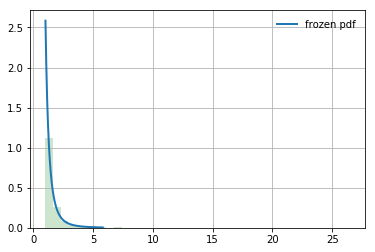

In [110]:
ax.legend(loc='best', frameon=False)
ax.grid(True)
plt.show()